In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import math
import sys
import time
import os
import powerlaw

In [4]:
def progressbar(cur,total):  
    percent = '{:.2%}'.format(cur / total)  
    sys.stdout.write('\r')  
    sys.stdout.write('[%-50s] %s' % ( '=' * int(math.floor(cur * 50 /total)),percent))

# Class of RS Dataset
> 其中包括Amazon系列的推荐系统数据集，以及Book、Audio和Corssing数据集

 - 使用的数据集可以是：
     - amazonbook.csv
     - amazoncd.csv
     - amazonelectronic.csv
     - amazonmovie.csv
     - bookcorsing.csv
     - audioscrobbler.csv

> 同时学术数据集也可以使用

 - 可以使用的是：
     - algorithm.csv
     - artificialintelligence.csv
     - programminglanguage.csv

In [40]:
class dataset_rs:
    '''
    通过读取rs数据集，计算item和user的分布
    '''
    def __init__(self, filename): 
        # open file
        file = open('../data/' + filename + '.csv', 'r', encoding='utf8')
        
        # initialize the data and prepare for the numpy array
        degree_item = [0]*10000000
        weight_item = [0]*10000000
        degree_user = [0]*10000000
        weight_user = [0]*10000000
        cnt = 0
        
        # count lines
        result = os.popen('wc -l ../data/' + filename + '.csv')
        total_line = int(result.read().split(' ')[0])
        print("total line:", total_line)
        
        # start
        print("Start reading from " + filename)
        # read the file
        for line in file:
            cnt = cnt + 1
            # progressbar(cnt, total_line)
            if cnt == 1:
                continue
            if cnt % 1000000 == 0:
                print(cnt)
            line = line.strip().split(',')
            
            '''
            user: 在amazon数据集中表示的是user，在学术网络中表示的是author
            item: 在amazon数据集中表示的是item(例如book)，在学术网络中表示的是field
            '''
            user = hash(line[0])%10000000
            item = hash(line[1])%10000000
            try:
                rate = float(int(line[2]))
            except:
                try:
                    rate = float(line[2])
                except:
                    print(line)
            # item degree and vertex weight distribution
            degree_item[item] = degree_item[item] + 1
            weight_item[item] = weight_item[item] + rate
            # user degree and vertex weight distribution
            degree_user[user] = degree_user[user] + 1
            weight_user[user] = weight_user[user] + rate
        # 统计item相关的分布数列
        deg_item = np.array(degree_item)
        wei_item = np.array(weight_item)
        # 统计item相关的分布数列
        deg_user = np.array(degree_user)
        wei_user = np.array(weight_user)
        # 计算度数
        bins_item = np.bincount(deg_item)
        binw_item = np.bincount(wei_item.astype('int'))
        # 计算度数
        bins_user = np.bincount(deg_user)
        binw_user = np.bincount(wei_user.astype('int'))
        print("finish init recommendation system dataset")
        
        # 初始化user完成
        self.degseq_user = bins_user
        self.weiseq_user = binw_user
        self.xind_user = np.arange(bins_user.shape[0])
        # 初始化item完成
        self.degseq_item = bins_item
        self.weiseq_item = binw_item
        self.xind_item = np.arange(bins_item.shape[0])
    
    def get_distribution(self, target="user"):
        if target == "item":
            return self.degseq_item, self.weiseq_item, self.xind_item
        else:
            return self.degseq_user, self.weiseq_user, self.xind_user

# RS Dataset Class Usage Sample

 - amazonbook
 - amazoncd
 - amazonelectronic
 - amazonmovie
 - bookcorssing
 - audioscrobbler
 - algorithm
 - artificialintelligence
 - programminglanguage

In [59]:
d = dataset_rs("algorithm")

total line: 3895052
Start reading from algorithm
1000000
2000000
3000000
finish init recommendation system dataset


In [60]:
degseq, weiseq, xind = d.get_distribution("item")

# Plot item

In [61]:
print(len(degseq), len(weiseq), len(xind))

257274 460294 257274


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


user p_value: 0.26300875216973196 user alpha: 2.271016199678316 user xmin: 3.0
user p_value: 0.8440491433549113 user alpha: 2.532032414681126 user xmin: 3.0


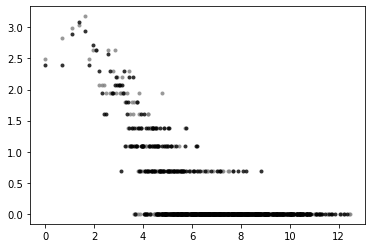

In [62]:
results = powerlaw.Fit(degseq)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(degseq),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)

results = powerlaw.Fit(weiseq)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(weiseq[:len(xind)]),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)

In [63]:
degseq, weiseq, xind = d.get_distribution()

# Plot user

In [64]:
print(len(degseq), len(weiseq), len(xind))

146 20865 146


user p_value: 0.7061591210207212 user alpha: 1.3946229850439906 user xmin: 954.0
user p_value: 0.8600425120833416 user alpha: 1.4626015828803482 user xmin: 730.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


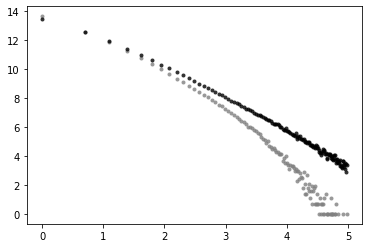

In [67]:
results = powerlaw.Fit(degseq)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(degseq),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)

results = powerlaw.Fit(weiseq)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(weiseq[:len(xind)]),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)

# Class of SN Dataset

## Class of Weight Rate

In [14]:
class MapWeightRate(object):
    def __init__(self):
        self._mappinglist = []
        self._default = 10000
        i = 0
        n = 0
        while n <= self._default:
            i = i + 1
            n = i ** 2
            # print(n)
            self._mappinglist.append(n)
        self._ratingscale = i
        self._maxwei = 0
        # print(self._ratingscale)
    def mappingFunc(self, weight):
        if weight > self._mappinglist[-1]:
            # print('Extending...')
            k = len(self._mappinglist)
            while k**2 < weight:
                k += 1
                self._mappinglist.append(k**2)
        if weight > self._maxwei:
            self._maxwei = weight
        for i in range(len(self._mappinglist)):
            if weight <= self._mappinglist[i]:
                return i + 1
    def seeRatingScale(self):
        return self.mappingFunc(self._maxwei)
    def getMappingList(self):
        return self._mappinglist

## SN's main Class

In [15]:
class dataset_sn:
    '''
    通过读取sn数据集，获取source和target的分布
    推特数据集：source: followee, target: follower
    '''
    def __init__(self, filename, total_lines=10000000):
        degree_source = {} #users
        degree_target = {} #followers
        weight_source = {} #user_weight
        weight_target = {} #follower_weight
        file = open('../data/' + filename, 'r', encoding='utf8')
        
        '''
        # count lines
        result = os.popen('wc -l ../data/' + filename)
        total_line = int(result.read().split(' ')[0])
        print("total line:", total_line)
        '''
        
        # start
        print("Start reading from " + filename)
        cnt = 0
        for line in file:
            cnt += 1
            source = line.split('\t')[0]
            target = line.split('\t')[1].split('\n')[0]
            # 统计degree在source user中和在target user中的分布
            if source in degree_source.keys():
                degree_source[source] += 1
            else:
                degree_source[source] = 1
            if target in degree_target.keys():
                degree_target[target] += 1
            else:
                degree_target[target] = 1
            if cnt == total_lines:
                break
        print("finish degree calculate")
        
        # 统计weight在source user中和在target user中的分布    
        '''需要准备基本的构造函数'''
        s2t = MapWeightRate()
        t2s = MapWeightRate()
        file = open('../../data/' + filename, 'r', encoding='utf8')
        cnt = 0
        for line in file:
            cnt += 1
            source = line.split('\t')[0]
            target = line.split('\t')[1].split('\n')[0]
            if source in weight_source:
                if target in degree_source:
                    weight_source[source] += s2t.mappingFunc(degree_source[target])
                else:
                    weight_source[source] += 1
            else:
                if target in degree_source:
                    weight_source[source] = s2t.mappingFunc(degree_source[target])
                else:
                    weight_source[source] = 1

            if target in weight_target:
                if source in degree_target:
                    weight_target[target] += t2s.mappingFunc(degree_target[source])
                else:
                    weight_target[target] += 1
            else:
                if source in degree_target:
                    weight_target[target] = t2s.mappingFunc(degree_target[source])
                else:
                    weight_target[target] = 1
            if cnt == total_lines:
                break
        
        print("finish weight calculate")
        print("finish", cnt, "line input")
        
        # 计算degree distribution
        # source degree(users)
        degree = []
        for k in degree_source.keys():
            degree.append(degree_source[k])
        np.set_printoptions(threshold=np.inf)
        bins_source = np.bincount(np.array(degree))
        # target degree(users)
        degree = []
        for k in degree_target.keys():
            degree.append(degree_target[k])
        np.set_printoptions(threshold=np.inf)
        bins_target = np.bincount(np.array(degree))
        
        # 计算weight distribution
        weight = []
        for k in weight_source.keys():
            weight.append(weight_source[k])
        np.set_printoptions(threshold=np.inf)
        binw_source = np.bincount(np.array(weight))
        
        weight = []
        for k in weight_target.keys():
            weight.append(weight_target[k])
        np.set_printoptions(threshold=np.inf)
        binw_target = np.bincount(np.array(weight))
        print("finish init social network dataset")
        
        # 初始化source完成
        self.degseq_source = bins_source
        self.weiseq_source = binw_source
        self.xind_source = np.arange(bins_source.shape[0])
        # 初始化target完成
        self.degseq_target = bins_target
        self.weiseq_target = binw_target
        self.xind_target = np.arange(bins_target.shape[0])

    def get_distribution(self, target="source"):
        if target == "target":
            return self.degseq_target, self.weiseq_target, self.xind_target
        else:
            return self.degseq_source, self.weiseq_source, self.xind_source

## 关于xind的使用

```xind = np.arange(self.degseq_source.shape[0])```

In [76]:
s = dataset_sn("twitter_rv.net", 20000000)

Start reading from twitter_rv.net
finish degree calculate
finish weight calculate
finish 20000000 line input


In [81]:
degseq, weiseq, xind = s.get_distribution("target")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit


user p_value: 0.5306294576446865 user alpha: 1.375912506017725 user xmin: 4.0
user p_value: 0.24246092927519103 user alpha: 1.4572588671483935 user xmin: 125.0


/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


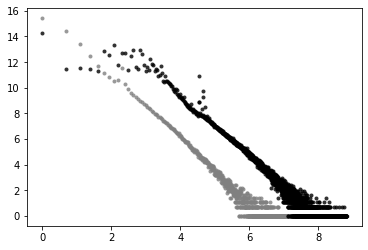

In [82]:
results = powerlaw.Fit(degseq)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(degseq),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)

results = powerlaw.Fit(weiseq)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(weiseq[:len(xind)]),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)

In [83]:
degseq, weiseq, xind = s.get_distribution("source")

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


user p_value: 0.5367431504183167 user alpha: 2.1035138832921403 user xmin: 27.0


Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/acemap/.local/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


user p_value: 0.7622558425159807 user alpha: 5.80114705115003 user xmin: 10.0


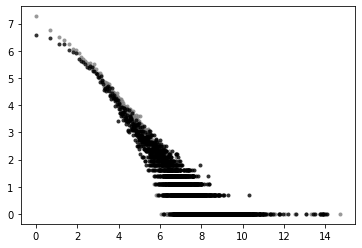

In [91]:
results = powerlaw.Fit(degseq)
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(degseq),'o',color = 'gray', alpha = 0.8, markersize=4, markeredgewidth=0.0)

results = powerlaw.Fit(weiseq[200:])
alpha = results.power_law.alpha
xmin = results.power_law.xmin
R, p_value = results.distribution_compare('power_law', 'lognormal')
print("user p_value:", p_value, "user alpha:", alpha, "user xmin:", xmin)
plt.plot(np.log(xind),np.log(weiseq[:len(xind)]),'o',color = 'black', alpha = 0.8, markersize=4, markeredgewidth=0.0)

In [18]:
if __name__== '__main__':
    print("hello")

hello
